<img src="assets/pngegg.png" style="display:block; margin:auto" width=350>

<div align="center"> <h1 align="center"> Project: Explanatory Data Visualization on Exchange </h1> </div>

#### The goal
In this analysis, we will use a dataset focused on exchange rates, with the primary objective of demonstrating skills in the domain of explanatory data visualization using Python. While doing this, we are going to look into the "The Great Recession", which originated in the USA and subsequently spread throughout the world. Spanning from 2007 to 2009 in the USA, this economic downturn persisted for an extended duration in other economies worldwide. The root cause was excessive mortgage lending to borrowers who normally would not qualify for a home loan, which greatly increased risk to the lender.

#### Exchange Rate
Exchange rates refer to the value at which one currency can be exchanged for another. They represent the relative value of different currencies in the foreign exchange market. Exchange rates fluctuate based on various factors, including economic indicators, interest rates, political stability and market speculation.

Exchange rates are typically quoted in pairs, with one currency serving as the base currency and the other as the counter or quote currency. The value of the base currency is expressed in the counter currency. For example, if the exchange rate states the euro to US dollar ratio is 1.5, you would receive 1.5 US dollars for spending 1.0 euros. In such cases, a euro has a higher value than a US dollar according to that specific exchange rate.

#### The Dataset

The dataset utilized in this analysis encompasses daily Euro exchange rates spanning the years 1999 to 2021. This dataset is accessible on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) and provided by Daria Chemkaeva. The European Central Bank is serving as the primary data source. It should be noted, that the dataset undergoes regular updates. The version used in this analysis was obtained in January 2021.

Lets start!

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*
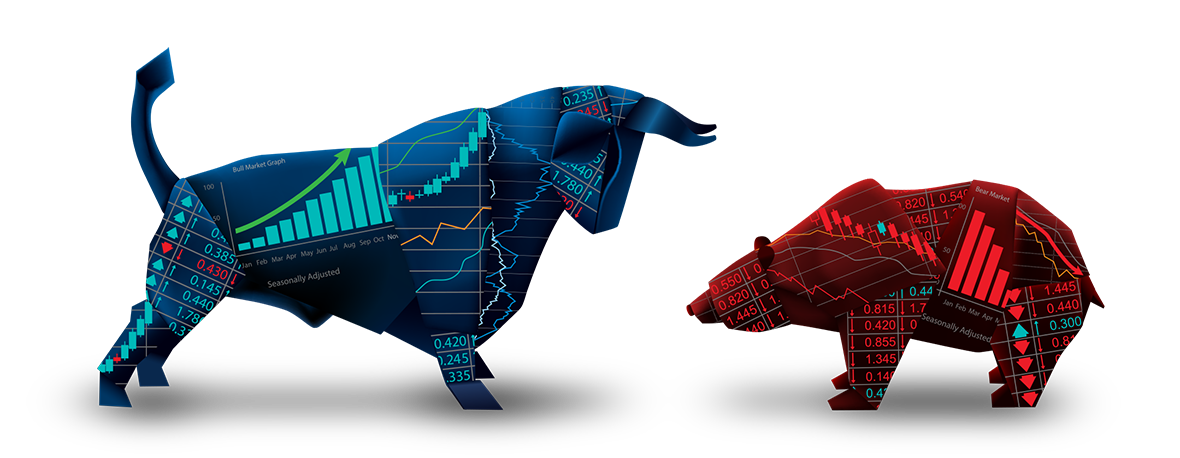

#### Reading the Data

In [1]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

#### Cleaning the Data 

In [4]:
# Rename columns
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)

# Transform 'Time' to datetime format, sort_values and reset_index
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      5699 non-null   datetime64[ns]
 1   [Australian dollar ]      5699 non-null   object        
 2   [Bulgarian lev ]          5297 non-null   object        
 3   [Brazilian real ]         5431 non-null   object        
 4   [Canadian dollar ]        5699 non-null   object        
 5   [Swiss franc ]            5699 non-null   object        
 6   [Chinese yuan renminbi ]  5431 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           5699 non-null   object        
 9   [Danish krone ]           5699 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  [UK pound sterling ]      5699 non-null   object        
 12  [Greek drachma ]    

In [6]:
# Slice column 0 (Time) and 39 (US_dollar), safe to new variable
euro_to_dollar = exchange_rates.iloc[:,[0, 39]].copy()

# Check US_dollar column
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

There are 62 "-" characters, we're going to filter these rows in the next step below.

In [7]:
# Remove all rows with '-'
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-'] 

# Transform to float format
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar['US_dollar'].value_counts()

US_dollar
1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: count, Length: 3527, dtype: int64

In [8]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


There are 5637 rows for `Time` and `US_dollar`, no missing values. `Time` is datetime format, `US_dollar` float.

#### The Rolling Mean

Rolling Mean, sometimes referred to as a moving average, is a metric that calculates trends over short periods of time using a set of data. Specifically, it helps calculate trends when they might otherwise be difficult to detect. For instance, if your data set includes many points where the numbers shift up and down drastically, you might not see whether it trends up or down over time.

Should the objective be to conceal short-term fluctuations and exclusively emphasize enduring patterns, the implementation of a rolling mean can be employed. Presented below are six visual representations, beginning with the depiction of the original values, succeeded by subsequent graphs featuring computed rolling means. For instance, the second graph is characterized by a rolling mean computed over a span of 7 values. Consequently, the value at the 7th row and the six antecedent values are aggregated, followed by the computation of the mean. This iterative process is applied across the complete row.

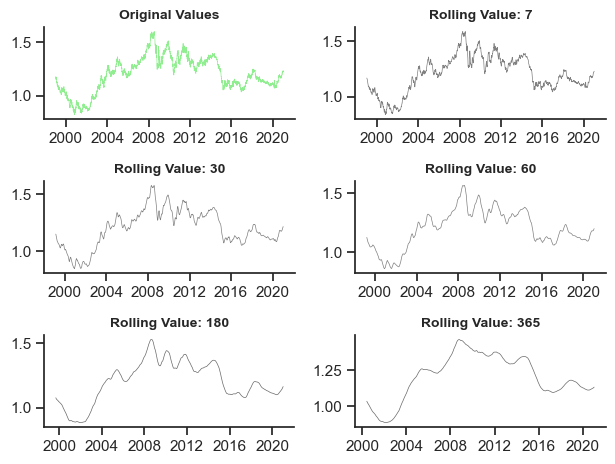

In [9]:
# Set seaborn parameters
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Creating six subplots with varying rolling mean for US_dollar column
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'], color='lightgreen', linewidth=.5)
plt.title('Original Values', fontsize=10, weight='bold')

for i, rolling_mean, color in zip([2, 3, 4, 5, 6],
                          [7, 30, 60, 180, 365],
                                 ['grey', 'gray', 'gray', 'dimgray', 'dimgray']):

    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(rolling_mean).mean(), color=color, linewidth=.5)
    plt.title('Rolling Value: ' + str(rolling_mean), fontsize=10, weight='bold') 

plt.tight_layout()
plt.show()

In [10]:
# Set the rolling mean to the value 30
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

#### The Idea

We illustrate the fluctuations in the euro-dollar exchange rate throughout "The Great Recession", providing a comparative analysis with the data from 2006 - 2009. A line plot serves as the chosen visualization method for this purpose. 





In [11]:
# Create two new datasets, one with values for time between 2007-2009 and one with values for time between 2006-2010
great_recession = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year.between(2007, 2008)]
great_recession_06_09 = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year.between(2006, 2009)]

In [12]:
great_recession.head()

,Time,US_dollar,rolling_mean
2086,2007-01-02,1.3270,1.314257
2087,2007-01-03,1.3231,1.315780
2088,2007-01-04,1.3106,1.316663
2089,2007-01-05,1.3084,1.317563
2090,2007-01-08,1.3006,1.317963


In [13]:
great_recession_06_09.tail()

,Time,US_dollar,rolling_mean
2863,2009-12-24,1.4398,1.477640
2865,2009-12-28,1.4405,1.476097
2866,2009-12-29,1.4433,1.474323
2867,2009-12-30,1.4338,1.472533
2868,2009-12-31,1.4406,1.470697


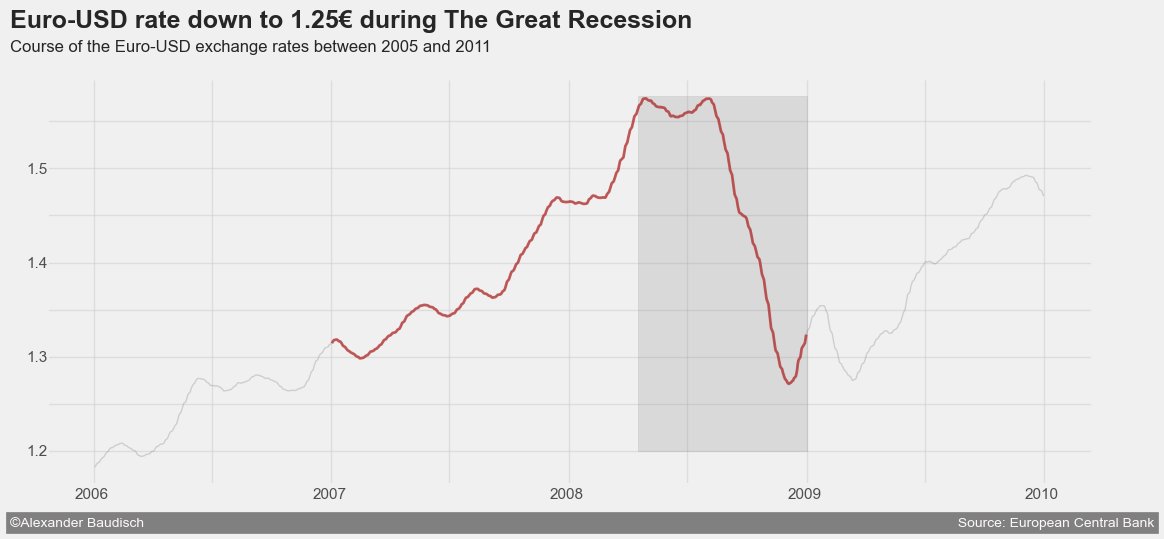

In [14]:
# Set style to 'fivethirtyeight'
style.use('fivethirtyeight')

# Initializing the plot
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(great_recession_06_09['Time'], 
        great_recession_06_09['rolling_mean'], 
        alpha=0.3, color='grey', linewidth=1)

# Highlight the 2007-2009 period
ax.plot(great_recession['Time'], 
        great_recession['rolling_mean'], 
        alpha=.7, color='firebrick', linewidth=2)

### Highlihting the crisis
ax.axvspan(xmin=13985, xmax=14245, ymin=0.085, ymax=0.96,
           alpha=.2, color='gray')

### Removing tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Adding xlabels
x = 13120
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.15, year, alpha=0.8, fontsize=11)
    x += 365

# Adding ylabels
y = 1.195
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13045, y, rate, alpha=0.8, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(13020, 1.65, "Euro-USD rate down to 1.25€ during The Great Recession",
        weight='bold', size=18)
ax.text(13020, 1.625, 'Course of the Euro-USD exchange rates between 2005 and 2011',
        size=12)

### Add transparency to the grid
ax.grid(alpha=0.5)

# Add a signature
ax.text(13020, 1.12, '©Alexander Baudisch' + ' '*210 + 'Source: European Central Bank',
        color = 'snow', backgroundcolor = 'grey',
        size=10)

plt.show()

The graph above shows the development of the EUR-USD exchange rate over a period from 2006 to the end of 2009. After the exchange rate in our excerpt rose to an all-time high of $1.59 per euro from the beginning of 2006 to mid-2008, it then fell strongly. The remarkable thing is that **The Great Recession** began at the end of 2007, but the EURO-USD exchange rate rose sharply afterwards. 

A possible explanation for this could be described with the title “Flight to Safety”. As the financial crisis unfolded, investors sought safer assets. Traditionally, the U.S. Dollar is considered a safe-haven currency. However, during certain periods of the crisis, concerns about the stability of the U.S. financial system and the broader global economic uncertainty led investors to diversify their holdings, including allocating funds to the euro. This increased demand for the euro might have contributed to its appreciation. By the end of 2008, the impact of the crisis was also evident on the € and the value fell to $1.26 per euro.

In [15]:
#### Euro-Yen

In [16]:
# Slice column 0 (Time) and 20 (yen), safe to new variable
euro_to_yen = exchange_rates.iloc[:,[0, 20]].copy()
euro_to_yen.rename(columns={'[Japanese yen ]': 'yen'}, inplace=True)

# Remove all rows with '-'
euro_to_yen = euro_to_yen[euro_to_yen['yen'] != '-'] 

# Transform to float format
euro_to_yen['yen'] = euro_to_yen['yen'].astype(float)
euro_to_yen['yen'].value_counts()

yen
132.82    9
124.40    8
136.97    7
134.32    7
124.45    7
         ..
157.94    1
157.01    1
158.91    1
159.35    1
126.62    1
Name: count, Length: 3504, dtype: int64

In [17]:
# Set the rolling mean to the value 30
euro_to_yen['rolling_mean'] = euro_to_yen['yen'].rolling(30).mean()

In [18]:
# Create two new datasets, one with values for time between 2007-2009 and one with values for time between 2006-2010
great_recession_yen = euro_to_yen.copy()[euro_to_yen['Time'].dt.year.between(2007, 2008)]
great_recession_06_09_yen = euro_to_yen.copy()[euro_to_yen['Time'].dt.year.between(2006, 2009)]

In [19]:
great_recession_yen

,Time,yen,rolling_mean
2086,2007-01-02,157.76,153.922000
2087,2007-01-03,157.76,154.141667
2088,2007-01-04,156.11,154.293000
2089,2007-01-05,154.55,154.403333
2090,2007-01-08,154.42,154.525667
...,...,...,...
2601,2008-12-23,126.03,121.540333
2602,2008-12-24,126.65,121.701667
2605,2008-12-29,128.98,121.989667
2606,2008-12-30,127.40,122.164000


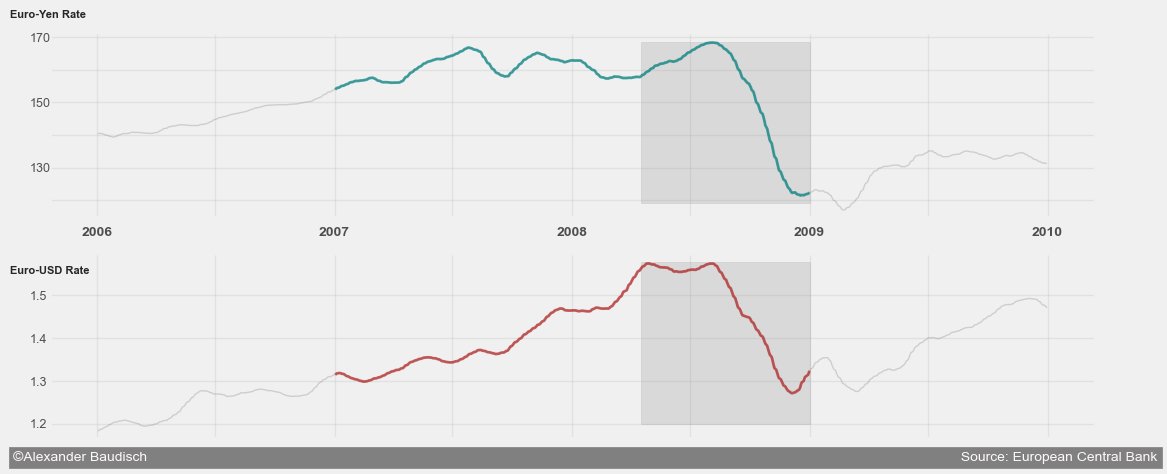

In [20]:
# Set style to 'fivethirtyeight'
style.use('fivethirtyeight')

# Initializing the plot
fig, ax = plt.subplots(2, figsize=(12,5))

ax[0].plot(great_recession_06_09_yen['Time'], 
        great_recession_06_09_yen['rolling_mean'], 
        alpha=0.25, color='dimgrey', linewidth=1)

# Highlight the 2007-2009 period
ax[0].plot(great_recession_yen['Time'], 
        great_recession_yen['rolling_mean'], 
        alpha=.7, color='teal', linewidth=2)

### Highlihting the crisis
ax[0].axvspan(xmin=13985, xmax=14245, ymin=0.085, ymax=0.96,
           alpha=.2, color='gray')

### Removing tick labels
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
                      
# Adding ylabels
y = 128.7
for rate in ['130', '150', '170']:
    ax[0].text(13045, y, rate, alpha=0.8, fontsize=9)
    y += 20
    
# Adding xlabels
x = 13125
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax[0].text(x, 109, year, alpha=0.8, fontsize=10, weight='bold')
    x += 365

## Adding a title and a subtitle    
ax[0].text(13015, 176, "Euro-Yen Rate",
        weight='bold', size=8)

### Add transparency to the grid
ax[0].grid(alpha=0.4)

##             ##
## Second Plot ##
##             ##

ax[1].plot(great_recession_06_09['Time'], 
        great_recession_06_09['rolling_mean'], 
        alpha=0.25, color='dimgrey', linewidth=1)

ax[1].plot(great_recession['Time'], 
        great_recession['rolling_mean'], 
        alpha=.7, color='firebrick', linewidth=2)

ax[1].axvspan(xmin=13985, xmax=14245, ymin=0.085, ymax=0.96,
           alpha=.2, color='gray')

ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

y = 1.19
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax[1].text(13045, y, rate, alpha=0.8, fontsize=9)
    y += 0.1

ax[1].text(13015, 1.55, "Euro-USD Rate",
        weight='bold', size=8)

ax[0].text(13020, 40, '©Alexander Baudisch' + ' '*210 + 'Source: European Central Bank',
        color = 'snow', backgroundcolor = 'grey',
        size=10)

ax[1].grid(alpha=0.4)

plt.show()

In the graph above we have now shown the development of the Euro-USD exchange rate and at the same time the development of the Euro-Yen exchange rate. The colored lines show the period of the great recession 2007-2009. As can be seen, the development of the Japanese yen is very similar to the USD. At the beginning of the crisis in 2007 there was also an increase until the value of the euro fell compared to the other currencies in mid-late 2008. As already suspected, the reason could be the many investors who tried to diversify their holdings, including allocating funds to the euro.

In the presented graph, the temporal evolution of the Euro-USD exchange rate and concurrently, the Euro-Yen exchange rate, is illustrated. The colored lines show the period of the great recession 2007-2009. Notably, the trajectory of the Japanese yen exhibits a resemblance to that of the U.S. dollar. A visible increase occurs at the onset of the crisis in 2007, followed by a decline in the value of the euro vis-à-vis these currencies in the latter part of 2008. As already mentioned, one reason for this trend can be attributed to the noticeable phenomenon that many investors diversified their portfolios, a strategy that also included the allocation of funds to the euro.





#### Compare Three US Presidencies

Now we seek to undertake an additional visual representation to assess alterations in the euro-dollar exchange rate across the tenures of the last three U.S. presidents: George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021). 

First, we divide the data into the three periods in which the presidents were in office.





In [21]:
three_presidents = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]

# Dataset Bush
president_bush = three_presidents.copy()[three_presidents['Time'].dt.year < 2009]

# Dataset Obama
president_obama = three_presidents.copy()[(three_presidents['Time'].dt.year >= 2009) 
& (three_presidents['Time'].dt.year < 2017)]

# Dataset Trump
president_trump = three_presidents.copy()[(three_presidents['Time'].dt.year >= 2017) 
& (three_presidents['Time'].dt.year < 2021)]

C:\Users\mexic\AppData\Local\Temp\ipykernel_5484\2413983950.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha=0.3)
C:\Users\mexic\AppData\Local\Temp\ipykernel_5484\2413983950.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '','2015', '', '2017'], alpha=0.3)
C:\Users\mexic\AppData\Local\Temp\ipykernel_5484\2413983950.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '','2020', '', '2021'],alpha=0.3)


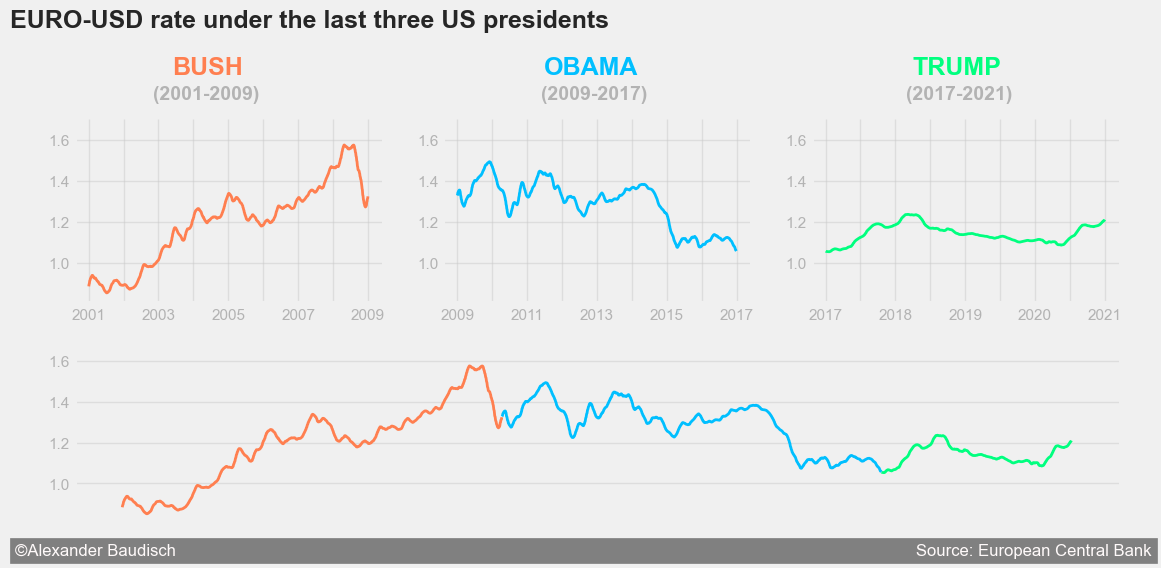

In [22]:
# Set FiveThirtyEight style
style.use('fivethirtyeight')

### Subplots
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)

### Bush
ax1.plot(president_bush['Time'], president_bush['rolling_mean'],color='coral', linewidth=2)
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha=0.3)
ax1.text(12200, 1.92, 'BUSH', fontsize=18, weight='bold',color='coral')
ax1.text(12000, 1.8, '(2001-2009)', weight='bold',alpha=0.3)

### Obama
ax2.plot(president_obama['Time'], president_obama['rolling_mean'],color='deepskyblue', linewidth=2)
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '','2015', '', '2017'], alpha=0.3)
ax2.text(15150, 1.92, 'OBAMA', fontsize=18, weight='bold',color='deepskyblue')
ax2.text(15120, 1.8, '(2009-2017)', weight='bold',alpha=0.3)

### Trump
ax3.plot(president_trump['Time'], president_trump['rolling_mean'],color='springgreen', linewidth=2)
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '','2020', '', '2021'],alpha=0.3)
ax3.text(17620, 1.92, 'TRUMP', fontsize=18, weight='bold',color='springgreen')
ax3.text(17590, 1.8, '(2017-2021)', weight='bold',alpha=0.3)

### Bush-Obama-Trump
ax4.plot(president_bush['Time'], president_bush['rolling_mean'],color='coral', linewidth=2)
ax4.plot(president_obama['Time'], president_obama['rolling_mean'],color='deepskyblue', linewidth=2)
ax4.plot(president_trump['Time'], president_trump['rolling_mean'],color='springgreen', linewidth=2)
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(10500, 2.15, 
         'EURO-USD rate under the last three US presidents', fontsize=18, weight='bold')

### Adding a signature
ax4.text(10500, 0.65, '©Alexander Baudisch' + ' '*160 + 'Source: European Central Bank',color = 'snow', backgroundcolor = 'grey',size=12)

plt.show()

The depicted figure illustrates the Euro-USD exchange rates over the tenures of the three most recent U.S. presidents: Bush, Obama, and Trump. On average, the exchange rate maintained a value of $1.22 per euro throughout the terms of these presidents.



